## Limit of concave curves

- C shape curves 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


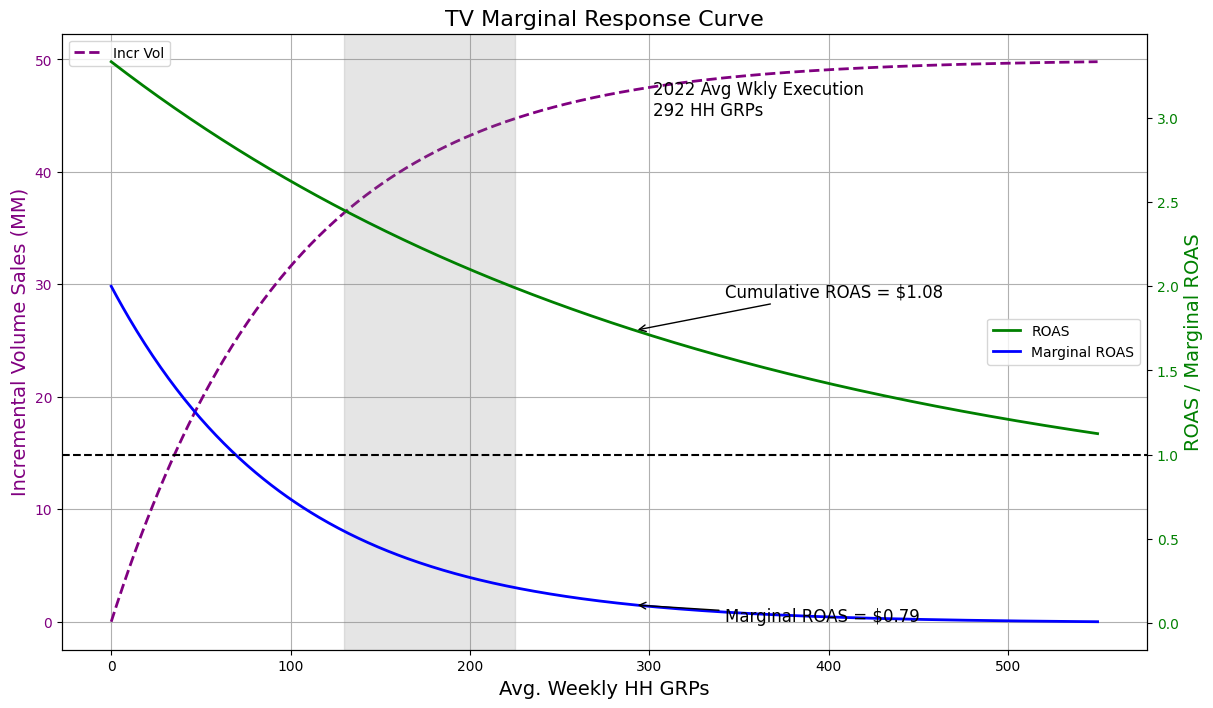

In [19]:

# Define the x-axis values (Average Weekly HH GRPs)
x = np.linspace(0, 550, 500)

# Define the functions for the curves
def incremental_volume(x):
    return 50 * (1 - np.exp(-0.01 * x))

def roas(x):
    # ROAS decreases slightly after a certain point
    initial_roas = 1.5  # Initial ROAS before diminishing returns
    decay_rate = 0.003  # Rate at which ROAS decreases
    base_roas = 0.6     # Minimum base ROAS value
    return initial_roas * np.exp(-decay_rate * (x - 200)) + base_roas

def marginal_roas(x):
    # Marginal ROAS declines faster than cumulative ROAS
    initial_marginal_roas = 2.0  # Initial Marginal ROAS before diminishing returns
    decay_rate = 0.01  # Rate at which Marginal ROAS decreases
    return initial_marginal_roas * np.exp(-decay_rate * x)

# Compute the y-values for each curve
y_incremental_volume = incremental_volume(x)
y_roas = roas(x)
y_marginal_roas = marginal_roas(x)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Incremental Volume Sales (dashed line)
ax1.plot(x, y_incremental_volume, ls='--', label='Incr Vol', color='purple', linewidth=2)
ax1.set_xlabel('Avg. Weekly HH GRPs', fontsize=14)
ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

# Plot ROAS (solid green line)
ax2 = ax1.twinx()
ax2.plot(x, y_roas, ls='-', label='ROAS', color='green', linewidth=2)
ax2.set_ylabel('ROAS / Marginal ROAS', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

# Plot Marginal ROAS (solid blue line)
ax2.plot(x, y_marginal_roas, ls='-', label='Marginal ROAS', color='blue', linewidth=2)
ax2.legend(loc='center right')

# Highlight optimal range
plt.axvspan(130, 225, color='grey', alpha=0.2, label='Optimal Range')

# Annotate specific points and values
optimal_point = 292
# ax1.axvline(x=optimal_point, color='black', linestyle='--')
ax1.text(optimal_point + 10, 45, '2022 Avg Wkly Execution\n292 HH GRPs', horizontalalignment='left', fontsize=12)

ax2.axhline(1,ls='--',lw=1.5,label='ROI',color='black')

ax2.annotate('Cumulative ROAS = $1.08', 
             xy=(optimal_point, roas(optimal_point)), xytext=(optimal_point + 50, roas(optimal_point) + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

ax2.annotate('Marginal ROAS = $0.79', xy=(optimal_point, marginal_roas(optimal_point)), xytext=(optimal_point + 50, marginal_roas(optimal_point) - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# Add titles and grid
plt.title('TV Marginal Response Curve', fontsize=16)
ax1.grid(True)
plt.show()


In [14]:
def weibull_transform(x,cte=50,beta=0.5,_lambda = 0.01):
    return cte * (1 - np.exp(-(x/_lambda)**beta))


import sympy as sp

# Define the variables
x, cte, beta, _lambda = sp.symbols('x cte beta _lambda')

# Define the function
weibull_function = cte * (1 - sp.exp(-(x / _lambda) ** beta))

# Calculate the derivative
weibull_derivative = sp.diff(weibull_function, x)
weibull_derivative

In [5]:
x = np.linspace(0, 550, 500)


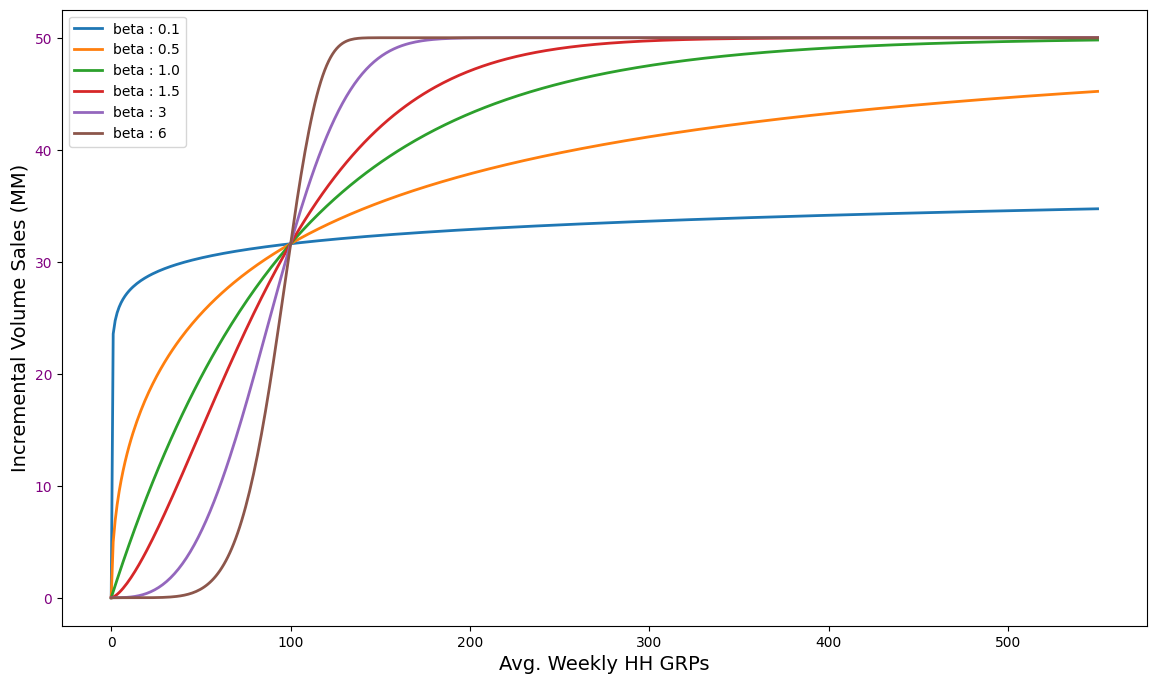

In [12]:
# Plot Incremental Volume Sales (dashed line)
fig, ax1 = plt.subplots(figsize=(14, 8))

for  beta in [0.1,0.5,1.,1.5,3,6]:
    y_incremental_volume = weibull_transform(x,cte=50,beta=beta)
    ax1.plot(x, y_incremental_volume, label=f'beta : {beta}', linewidth=2)
    ax1.set_xlabel('Avg. Weekly HH GRPs', fontsize=14)
    ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='black')
    ax1.tick_params(axis='y', labelcolor='purple')
    ax1.legend(loc='upper left')

plt.show()
plt.close()
